In [1]:
import numpy as np
import pandas as pd
import math
import numpy.random as rand
import scipy
from scipy.stats import binom as binomial
from scipy.stats import beta as betafunction
from scipy.stats import norm
from scipy.stats import gamma
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pickle
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True) #Want to be able to use tex in the plot labels

import seaborn
seaborn.set_style('ticks')
seaborn.set_color_codes()
import corner


In [2]:
#Load in chains run using all three datasets from fake data:
samples = []
i = 0
burnin = 1000
for line in open('chains/fakedata/veff0.5/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples50 = np.array(samples)
samples50 = samples50.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.6/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples60 = np.array(samples)
samples60 = samples60.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.7/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples70 = np.array(samples)
samples70 = samples70.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.8/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples80 = np.array(samples)
samples80 = samples80.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff0.9/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples90 = np.array(samples)
samples90 = samples90.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/veff1.0/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samples100 = np.array(samples)
samples100 = samples100.astype(float)

In [3]:
#Load in chains run using all three datasets from fake data:

samples = []
i = 0
for line in open('chains/fakedata/vaxcase/veff0.6/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samplesvc60 = np.array(samples)
samplesvc60 = samplesvc60.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/vaxcase/veff0.7/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samplesvc70 = np.array(samples)
samplesvc70 = samplesvc70.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/vaxcase/veff0.8/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samplesvc80 = np.array(samples)
samplesvc80 = samplesvc80.astype(float)

samples = []
i = 0
for line in open('chains/fakedata/vaxcase/veff0.9/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1

samplesvc90 = np.array(samples)
samplesvc90 = samplesvc90.astype(float)

In [4]:
#Actual data
Data_pd = pd.read_csv("../Data/FakeData50_veff0.6.csv",header=None)
Data60 = Data_pd.as_matrix()
vo60 = Data60[:,0].copy()
vt60 = Data60[:,1].copy()
so60 = Data60[:,2].copy()
st60 = Data60[:,3].copy()
cobs60 = Data60[:,4].copy()

total_cases60 = np.sum(cobs60[:])

vobs60 = vo60.copy()
vtry60 = vt60.copy()
sobs60 = so60.copy()
stry60 = st60.copy()


Data_pd = pd.read_csv("../Data/FakeData50_veff0.9.csv",header=None)
Data90 = Data_pd.as_matrix()
vo90 = Data90[:,0].copy()
vt90 = Data90[:,1].copy()
so90 = Data90[:,2].copy()
st90 = Data90[:,3].copy()
cobs90 = Data90[:,4].copy()
total_cases90 = np.sum(cobs90[:])

vobs90 = vo90.copy()
vtry90 = vt90.copy()
sobs90 = so90.copy()
stry90 = st90.copy()


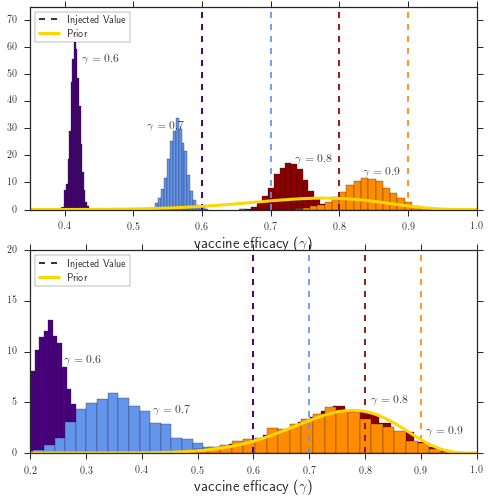

In [5]:
#Look at v_eff:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
ax0, ax1 = axes.flatten()

x = np.linspace(0,1,100)
y = scipy.stats.beta.pdf(x,a=15.,b=5.)
#veff50,b,c = plt.hist(samples50[:,6],bins=20, normed=True)
#plt.figure(figsize=(4*2,3*2))
veff60,b,c = ax0.hist(samples60[:,6],bins=20, normed=True, color ='indigo')
ax0.axvline(0.6,c='k',ls='--',label='Injected Value')
ax0.axvline(0.6,c='indigo',ls='--')
veff70,b,c = ax0.hist(samples70[:,6],bins=20, normed=True, color = 'cornflowerblue')
ax0.axvline(0.7,c='cornflowerblue',ls='--')
veff80,b,c = ax0.hist(samples80[:,6],bins=20, normed=True, color = 'darkred')
ax0.axvline(0.8,c='darkred',ls='--')
veff90,b,c = ax0.hist(samples90[:,6],bins=20, normed=True, color = 'darkorange')
ax0.axvline(0.9,c='darkorange',ls='--')
#veff100,b,c = plt.hist(samples100[:,6],bins=20, normed=True, color ='darkdarkgreen')
ax0.plot(x,y,color='gold',lw=3, label='Prior')
ax0.legend(loc='upper left',frameon=True)
ax0.annotate('$\gamma = 0.6$',(0.425,55),fontsize=12)
ax0.annotate('$\gamma = 0.7$',(0.52,30),fontsize=12)
ax0.annotate('$\gamma = 0.8$',(0.735,18),fontsize=12)
ax0.annotate('$\gamma = 0.9$',(0.835,13),fontsize=12)
ax0.set_xlim(0.35,1)
ax0.set_ylim(0,75)
ax0.set_xlabel('vaccine efficacy ($\gamma$)',fontsize=15)

veff60,b,c = ax1.hist(samplesvc60[:,6],bins=30, normed=True, color ='indigo')
ax1.axvline(0.6,c='k',ls='--',label='Injected Value')
ax1.axvline(0.6,c='indigo',ls='--')
veff70,b,c = ax1.hist(samplesvc70[:,6],bins=30, normed=True, color = 'cornflowerblue')
ax1.axvline(0.7,c='cornflowerblue',ls='--')
veff80,b,c = ax1.hist(samplesvc80[:,6],bins=30, normed=True, color = 'darkred')
ax1.axvline(0.8,c='darkred',ls='--')
veff90,b,c = ax1.hist(samplesvc90[:,6],bins=30, normed=True, color = 'darkorange')
ax1.axvline(0.9,c='darkorange',ls='--')
#veff100,b,c = plt.hist(samples100[:,6],bins=20, normed=True, color ='darkdarkgreen')
ax1.plot(x,y,color='gold',lw=3, label='Prior')
ax1.legend(loc='upper left',frameon=True)
ax1.annotate('$\gamma = 0.6$',(0.26,9),fontsize=12)
ax1.annotate('$\gamma = 0.7$',(0.42,4),fontsize=12)
ax1.annotate('$\gamma = 0.8$',(0.81,5),fontsize=12)
ax1.annotate('$\gamma = 0.9$',(0.91,2),fontsize=12)
ax1.set_xlim(0.2,1)
ax1.set_ylim(0,20)
ax1.set_xlabel('vaccine efficacy ($\gamma$)',fontsize=15)

plt.savefig('veff_fakedata.pdf')

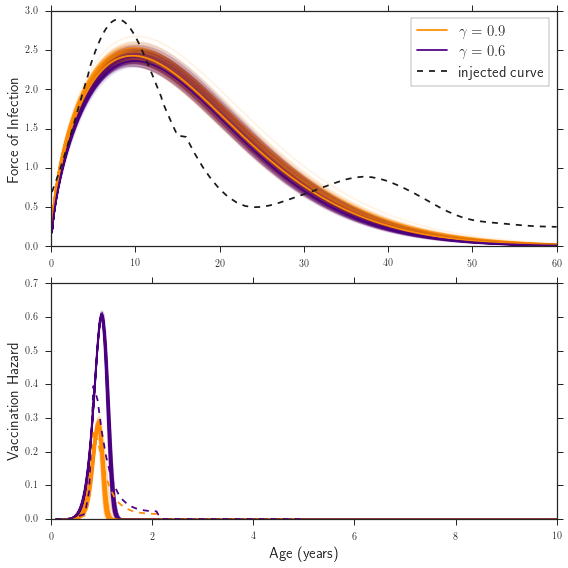

In [6]:
#Look at vh and foi:
foiinj = np.genfromtxt('../Simulations/foi_injected.csv',delimiter=',') #injected foi
vhdat = np.genfromtxt('../Simulations/pvaccCov90_30.csv',delimiter=' ') #injected vacc. hazard
vaxhazdat = vhdat[:,1].copy()
vhinj = np.zeros(60)
i=0
for vh in vhdat[:,1]:
    vhinj[i] = vh
    i += 1

xplot = np.linspace(1,60,60)
nspace = 2000
x = np.linspace(1,60*12,nspace)
foi50 = np.zeros(nspace)
foi60 = np.zeros(nspace)
foi70 = np.zeros(nspace)
foi80 = np.zeros(nspace)
foi90 = np.zeros(nspace)

vhaz60 = np.zeros(nspace)
vhaz70 = np.zeros(nspace)
vhaz80 = np.zeros(nspace)
vhaz90 = np.zeros(nspace)

l = len(samples60[:,0])
l = 2000
nplot = 300
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
ax0, ax1 = axes.flatten()

for k in range(nplot):
    index = np.random.randint(l)
    
    va60 = samples60[index,0] 
    vb60 = samples60[index,1] 
    vh60 = samples60[index,2]  
    fa60 = samples60[index,3] 
    fb60 = samples60[index,4] 
    fh60 = samples60[index,5] 
    ve60 = samples60[index,6]
    
    va70 = samples70[index,0] 
    vb70 = samples70[index,1] 
    vh70 = samples70[index,2]  
    fa70 = samples70[index,3] 
    fb70 = samples70[index,4] 
    fh70 = samples70[index,5] 
    ve70 = samples70[index,6]
    
    va80 = samples80[index,0] 
    vb80 = samples80[index,1] 
    vh80 = samples80[index,2] 
    fa80 = samples80[index,3] 
    fb80 = samples80[index,4] 
    fh80 = samples80[index,5] 
    ve80 = samples80[index,6] 

    
    va90 = samples90[index,0] 
    vb90 = samples90[index,1] 
    vh90 = samples90[index,2] 
    fa90 = samples90[index,3] 
    fb90 = samples90[index,4] 
    fh90 = samples90[index,5] 
    ve90 = samples90[index,6] 

    
    j = 0
    for i in x:
        a = float(i)
        foi90[j] = fh90*(a/fb90)**(fa90-1.)*np.exp(-(a/fb90)**(fa90))
        vhaz90[j] = vh90*(a/vb90)**(va90-1.)*np.exp(-(a/vb90)**(va90))
        
        foi60[j] = fh60*(a/fb60)**(fa60-1.)*np.exp(-(a/fb60)**(fa60))
        vhaz60[j] = vh60*(a/vb60)**(va60-1.)*np.exp(-(a/vb60)**(va60))
        j += 1
    ax0.plot(x/12.,foi90,alpha=0.1,color='darkorange')
    ax0.plot(x/12.,foi60,alpha=0.1,color='indigo')
    ax1.plot(x/12.,vhaz90,alpha=0.1,color='darkorange',linewidth=1)
    ax1.plot(x/12.,vhaz60,alpha=0.1,color='indigo',linewidth=1)

ax0.plot(x/12.,foi90,alpha=1.,color='darkorange',label='$\gamma = 0.9$')   
ax0.plot(x/12.,foi60,alpha=1.,color='indigo',label='$\gamma = 0.6$')
ax0.plot(foiinj[:,0]/12.,foiinj[:,1]/10.,'k--',label='injected curve')
ax1.plot(xplot/12.,vhinj/0.9,color='darkorange', linestyle='--')
ax1.plot(xplot/12.,vhinj/0.6,color='indigo', linestyle='--')
ax0.set_ylabel('Force of Infection',fontsize=15)
ax1.set_ylabel('Vaccination Hazard',fontsize=15)
ax0.legend(fontsize=15,frameon=True)
ax1.set_xlim(0,10)
plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('foivhaz_fakedata_vaxserocase.pdf')

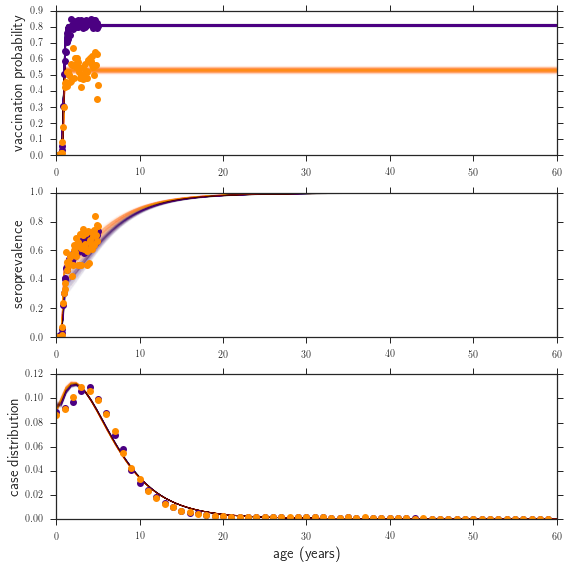

In [7]:
#Look at predicted vaccination level, seroprevalence, and case count:
nspace = 1200
x = np.linspace(1,60*12,nspace)
xplot = np.linspace(1,60,60)
xy = np.linspace(1,60,nspace)
cplot9 = np.zeros(nspace)
vplot9 = np.zeros(nspace)
splot9 = np.zeros(nspace)
cplot6 = np.zeros(nspace)
vplot6 = np.zeros(nspace)
splot6 = np.zeros(nspace)

l = len(samples60[:,0])
nplot = 300
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,8))
ax0, ax1, ax2 = axes.flatten()
for k in range(nplot):
    index = np.random.randint(l)
    
    va60 = samplesvc60[index,0] 
    vb60 = samplesvc60[index,1] 
    vh60 = samplesvc60[index,2]  
    fa60 = samplesvc60[index,3] 
    fb60 = samplesvc60[index,4] 
    fh60 = samplesvc60[index,5] 
    ve60 = samplesvc60[index,6]
    
    va90 = samplesvc90[index,0] 
    vb90 = samplesvc90[index,1] 
    vh90 = samplesvc90[index,2] 
    fa90 = samplesvc90[index,3] 
    fb90 = samplesvc90[index,4] 
    fh90 = samplesvc90[index,5] 
    ve90 = samplesvc90[index,6] 
    
    
    j = 0
    for i in x:
        a = float(i)
        vplot6[j] = 1. - np.exp(-vh60*(1. - np.exp(-(a/vb60)**va60)))
        splot6[j] = 1.0 - np.exp(-ve60*vh60*(1.-np.exp(-(i/vb60)**va60)) - fh60*(1. - np.exp((-(i/fb60)**fa60))))
        cplot6[j] = (1.-np.exp(-(fh60*fa60/fb60*(a*12./fb60))**(fa60-1.)*np.exp(-(a*12./fb60)**fa60)))\
        *(np.exp(-ve60*vh60*(1.-np.exp(-(a*12./vb60)**va60))-fh60*(1.-np.exp(-(a*12./fb60)**fa60))))
        
        vplot9[j] = 1. - np.exp(-vh90*(1. - np.exp(-(a/vb90)**va90)))
        splot9[j] = 1.0 - np.exp(-ve90*vh90*(1.-np.exp(-(i/vb90)**va90)) - fh90*(1. - np.exp((-(i/fb90)**fa90))))
        cplot9[j] = (1.-np.exp(-(fh90*fa90/fb90*((a*12.)/fb90))**(fa90-1.)*np.exp(-((a*12.)/fb90)**fa90)))\
        *(np.exp(-ve90*vh90*(1.-np.exp(-((a*12.)/vb90)**va90))-fh90*(1.-np.exp(-((a*12.)/fb90)**fa90))))
        j += 1
    ax0.plot(x/12,vplot6,alpha=0.01,color='indigo')
    ax1.plot((x-1)/12,splot6,alpha=0.01,color='indigo',linewidth=1)
    ax2.plot(x-1,cplot6/(sum(cplot6)*(x[1]-x[0])),alpha=0.01,color='indigo',linewidth=1)
    
    ax0.plot(x/12,vplot9,alpha=0.01,color='darkorange')
    ax1.plot((x-1)/12,splot9,alpha=0.01,color='darkorange',linewidth=1)
    ax2.plot(x-1,cplot9/(sum(cplot9)*(x[1]-x[0])),alpha=0.01,color='darkorange',linewidth=1)
        
ax0.plot(xplot/12.,vobs60.astype(float)/vtry60.astype(float), color ='indigo',linestyle='none',marker='o')
ax1.plot(xplot/12.,sobs60.astype(float)/stry60.astype(float),color='indigo',linestyle='none',marker='o')
ax2.plot(cobs60.astype(float)/total_cases60,color='indigo',linestyle='none',marker='o')

ax0.plot(xplot/12.,vobs90.astype(float)/vtry90.astype(float), color ='darkorange',linestyle='none',marker='o')
ax1.plot(xplot/12.,sobs90.astype(float)/stry90.astype(float),color='darkorange',linestyle='none',marker='o')
ax2.plot(cobs90.astype(float)/total_cases90,color='darkorange',linestyle='none',marker='o')

ax0.set_ylabel('vaccination probability',fontsize=15)
ax1.set_ylabel('seroprevalence',fontsize=15)
ax2.set_ylabel('case distribution',fontsize=15)
ax2.set_xlabel('age (years)',fontsize=15)

plt.xlim(0,60)
fig.tight_layout()
plt.savefig('vsc_simdata_vaxcase.pdf')

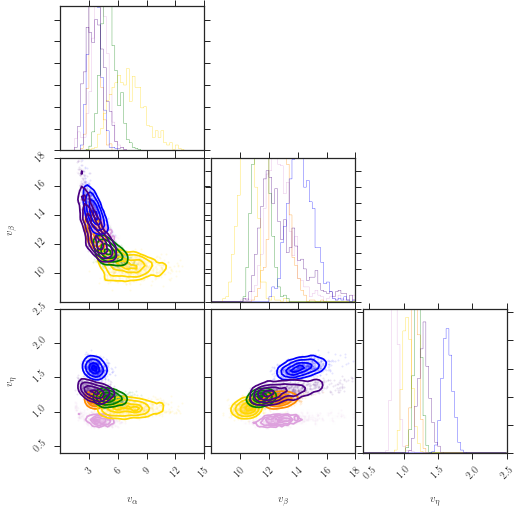

In [8]:
#Now you want to look at the real data.
#loc_subset = ['EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU', 'BASCONGO', 'KASAIOCC', 'KASAIOR',
 #          , 'NKIVU', 'SKIVU' ]
#country order: Katanga, Equateur, maniema, orientale, bandundu, kasaiocc, nkivu, skivu, (kasaior), (bascongo) (Kinshasa)
colors = ['darkorange','gold','green','blue','indigo','darkviolet','red','teal','grey']
burnin = 2000
loc_subset = ['EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU','KASAIOCC']#(0.5,4.),(500.,4500.),(0.,100.),(0.,1.)
#ranges = [(0.,4.),(10.,100.),(0.,20.),(0.,4.),(10.,100.),(0.,20.),(0.,1.)]


ranges = [(0.,15.),(8.,18.),(0.4,2.5)]
samples = []
i = 0
for line in open('chains/DRCLab/sero/KATANGA/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1
samples = np.array(samples)
samples = samples.astype(float)
csamp = samples[-1000:,0:3].copy()
fig = corner.corner(csamp,normed=True,color='plum',labels=[r"$v_\alpha$", r"$v_\beta$", r"$v_\eta$"], \
                    bins=50,range=ranges)

j = 0
for prov in loc_subset:
    samples = []
    c = colors[j]
    i = 0
    for line in open('chains/DRCLab/sero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    csamp = samples[-1000:,0:3].copy()
    #corner.corner(csamp,range=ranges,no_fill_contours=True,bins=50,plot_density=False,plot_countours=False,color=c,fig=fig)
    corner.corner(csamp,range=ranges,no_fill_contours=True,bins=50,smooth=True,plot_density=False,plot_countours=False,color=c,fig=fig)
    j += 1
    
fig.savefig('cornerplotvparams.pdf')

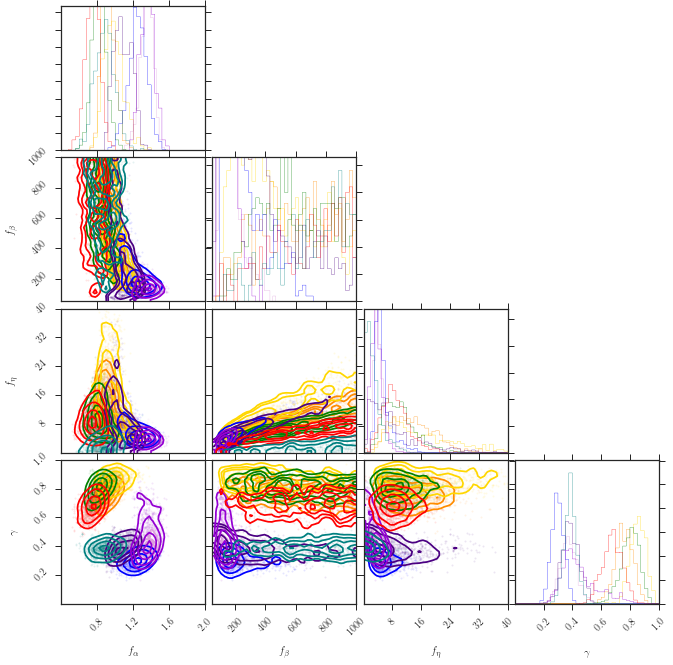

In [9]:
#country order: Katanga, Equateur, maniema, orientale, bandundu, kasaiocc, nkivu, skivu, (bascongo) (Kinshasa)
colors = ['darkorange','gold','green','blue','indigo','darkviolet','red','teal','grey']
burnin = 2000
loc_subset = ['EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU','KASAIOCC','KASAIOR','NKIVU','SKIVU']#(0.5,4.),(500.,4500.),(0.,100.),(0.,1.)
#ranges = [(0.,4.),(10.,100.),(0.,20.),(0.,4.),(10.,100.),(0.,20.),(0.,1.)]


ranges = [(0.4,2.),(50.,1000.),(0.,40.),(0.,1.)]
samples = []
i = 0
for line in open('chains/DRCLab/sero/KATANGA/chain_1.txt','r'):
    sample = line.split()
    if i> burnin:
        samples.append(sample)
    i += 1
samples = np.array(samples)
samples = samples.astype(float)
csamp = samples[-1000:,3:7].copy()
fig = corner.corner(csamp,normed=True,color='plum',labels=[r"$f_\alpha$", r"$f_\beta$", r"$f_\eta$",r"$\gamma$"], \
                    bins=50,range=ranges)

j = 0
for prov in loc_subset:
    samples = []
    c = colors[j]
    i = 0
    for line in open('chains/DRCLab/sero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    csamp = samples[-1000:,3:7].copy()
    corner.corner(csamp,range=ranges,no_fill_contours=True,bins=40,smooth=True,plot_density=False,plot_countours=False,color=c,fig=fig)
    j += 1

fig.savefig('cornerplotfparams.pdf')


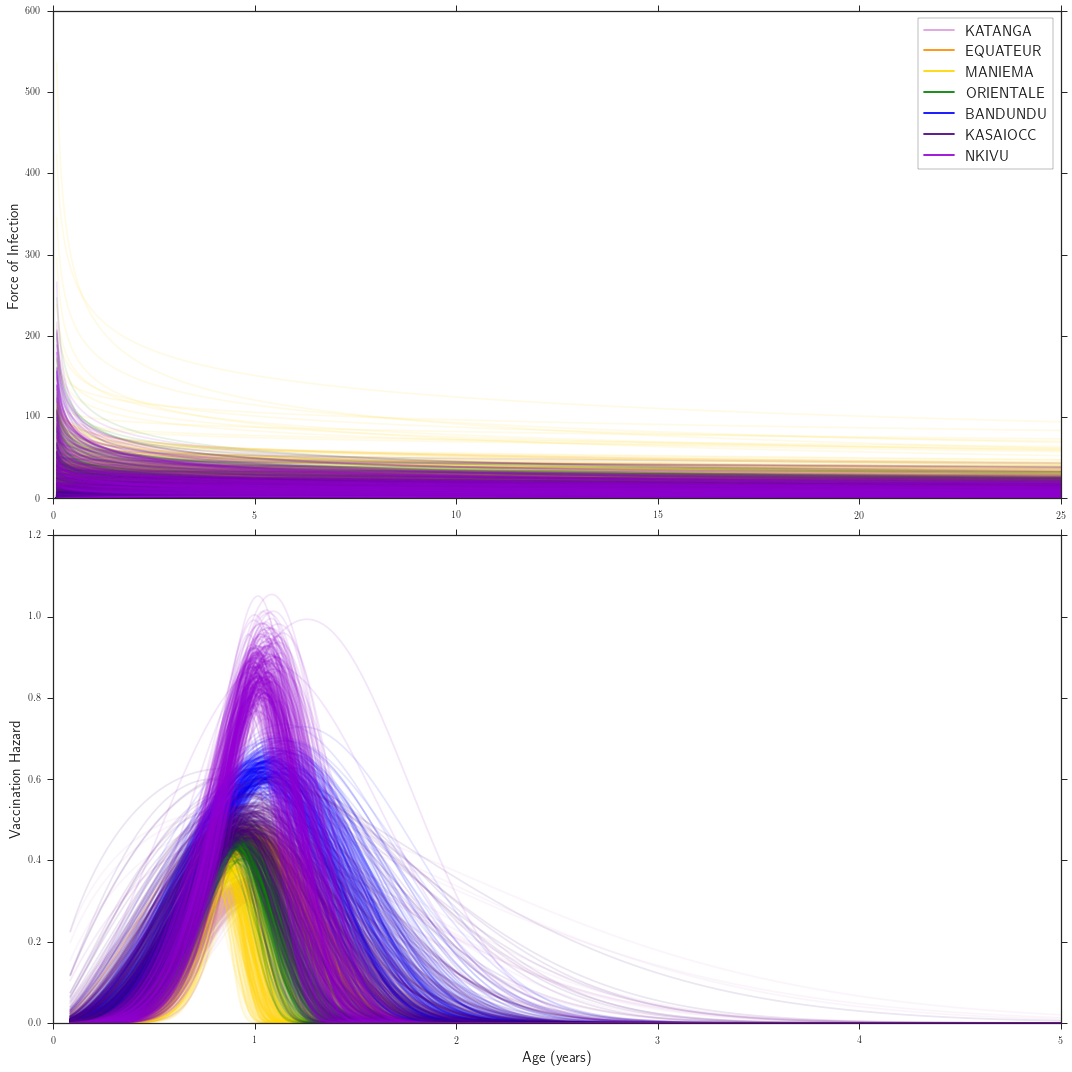

In [10]:
#Now FOI and vax hazard for DRC provinces
loc_subset = ['KATANGA','EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU','KASAIOCC','NKIVU']
colors = ['plum','darkorange','gold','green','blue','indigo','darkviolet','red','teal','grey','firebrick']
#loc_subset = ['BASCONGO','KINSHASA']
#colors = ['teal','firebrick'] #use grey for KASAIOCC
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
ax0, ax1 = axes.flatten()
j = 0
for prov in loc_subset:
    samples = []
    c = colors[j]
    j += 1
    i = 0
    for line in open('chains/DRCLab/sero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    nspace = 2000
    x = np.linspace(1,25*12,nspace)
    
    foi = np.zeros(nspace)
    vhaz = np.zeros(nspace)

    l = len(samples[:,0])
    nplot = 300

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]

       
        m = 0
        for i in x:
            a = float(i)
            foi[m] = fh*(a/fb)**(fa-1.)*np.exp(-(a/fb)**(fa))
            vhaz[m] = vh*(a/vb)**(va-1.)*np.exp(-(a/vb)**(va))
            m += 1
        ax0.plot(x/12.,foi,alpha=0.1,color=c)
        ax1.plot(x/12.,vhaz,alpha=0.1,color=c)

    ax0.plot(x/12.,foi60,alpha=1.,color=c,label=prov)
ax0.set_ylabel('Force of Infection',fontsize=15)
ax1.set_ylabel('Vaccination Hazard',fontsize=15)
ax0.legend(fontsize=15,frameon=True)
ax1.set_xlim(0,5)
plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('DRC_foivachaz_noSKivu.pdf')

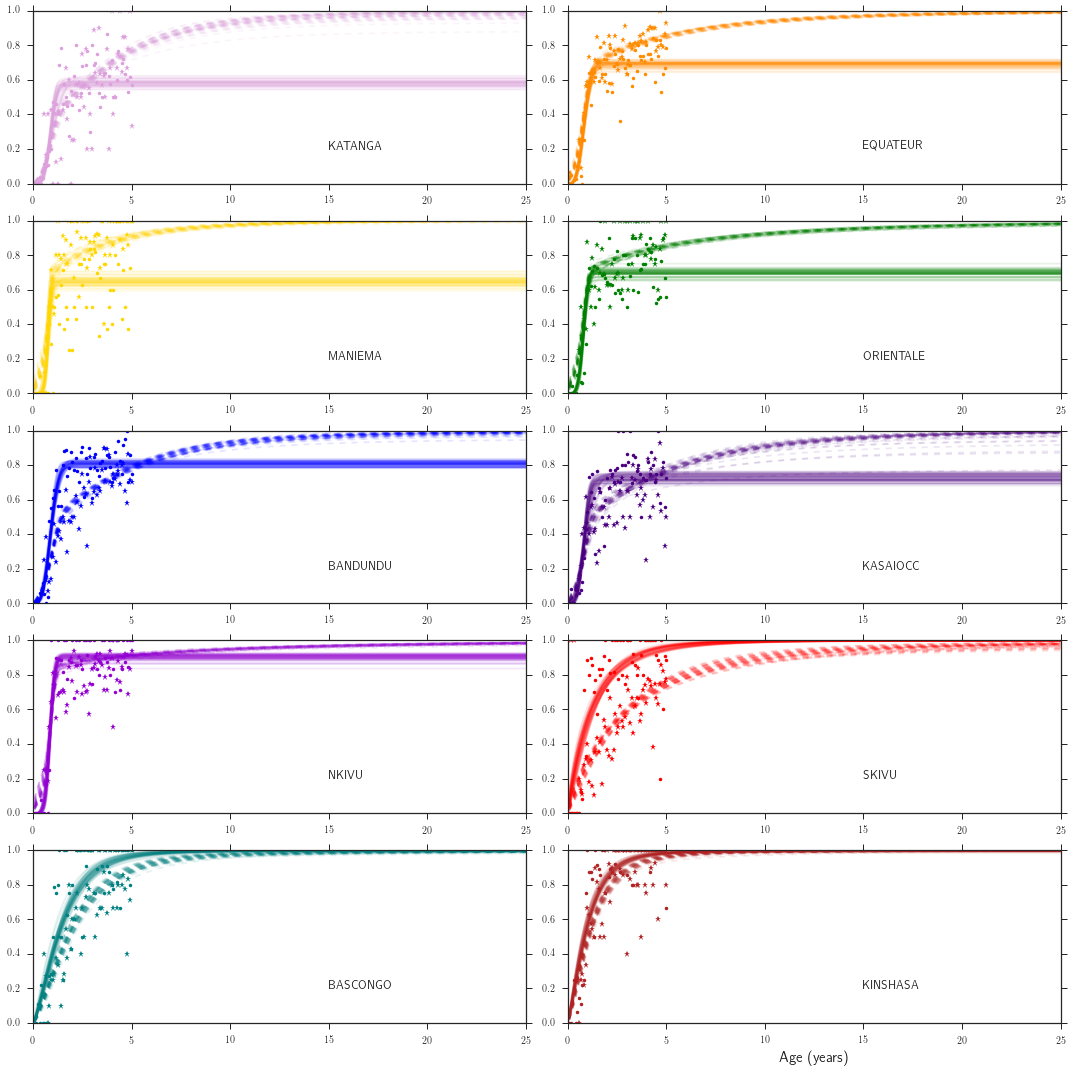

In [11]:
loc_subset = ['KATANGA','EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU','KASAIOCC','NKIVU','SKIVU','BASCONGO','KINSHASA']
#loc_subset = ['KATANGA','EQUATEUR','MANIEMA']
colors = ['plum','darkorange','gold','green','blue','indigo','darkviolet','red','teal','firebrick','grey']
#loc_subset = ['BASCONGO','KINSHASA']
#colors = ['teal','firebrick'] #use grey for KASAIOCC
#Real data, read in with Pandas.
vobs_pandas = pd.read_csv('../Data/Xvax.csv')
vtrials_pandas = pd.read_csv('../Data/Nvax.csv')
sobs_pandas = pd.read_csv('../Data/YseroNew.csv')
strials_pandas = pd.read_csv('../Data/NseroNew.csv')
cases_pandas = pd.read_csv('../Data/reported_cases_lab.csv')
xplot = np.linspace(1,60,60)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axis = axes.flatten()
j = 0
for prov in loc_subset:
    #Read in the actual data
    vobs = vobs_pandas.loc[:,prov]
    vtrial = vtrials_pandas.loc[:,prov]
    sobs = sobs_pandas.loc[:,prov]
    strial = strials_pandas.loc[:,prov]
    cases = cases_pandas.loc[:,prov]
    vo = vobs.values
    vt = vtrial.values
    so = sobs.values
    st = strial.values
    co = cases.values
    
    vobs = np.copy(vo)
    vtry = np.copy(vt)
    sobs = np.copy(so)
    stry = np.copy(st)
    cobs = np.copy(co)  
    vtry = np.array(vtry)
    
    
    

    #Get the samples for this province
    samples = []
    c = colors[j]
    ax = axis[j]
    j += 1
    i = 0
    for line in open('chains/DRCLab/sero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    nspace = 1000
    x = np.linspace(1,25*12,nspace)
    
    
    
    vacc = np.zeros(nspace)
    sero = np.zeros(nspace)
    case = np.zeros(nspace)

    l = len(samples[:,0])
    nplot = 50

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]

       
        m = 0
        for i in x:
            a = float(i)
            vacc[m] = 1. - np.exp(-vh*(1. - np.exp(-(a/vb)**va)))
            sero[m] = 1.0 - np.exp(-ve*vh*(1.-np.exp(-(i/vb)**va)) - fh*(1. - np.exp((-(i/fb)**fa))))
            m += 1
        ax.plot(x/12.,vacc,alpha=0.1,color=c)
        ax.plot(x/12.,sero,alpha=0.1,color=c,linestyle='dashed')
    ax.plot(xplot/12.,vobs.astype(float)/vtry.astype(float),color=c,marker='.',linestyle='none')
    ax.plot(xplot/12.,sobs.astype(float)/stry.astype(float),color=c,marker='*',linestyle='none')
    ax.annotate(prov,(15,0.2),fontsize=12)

#ax0.set_ylabel('Force of Infection',fontsize=15)
#ax1.set_ylabel('Vaccination Hazard',fontsize=15)
#ax0.legend(fontsize=15,frameon=True)
#ax1.set_xlim(0,5)
plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('VaccSeroFits.png')
#plt.savefig('DRC_foivachaz_noSKivu.pdf')

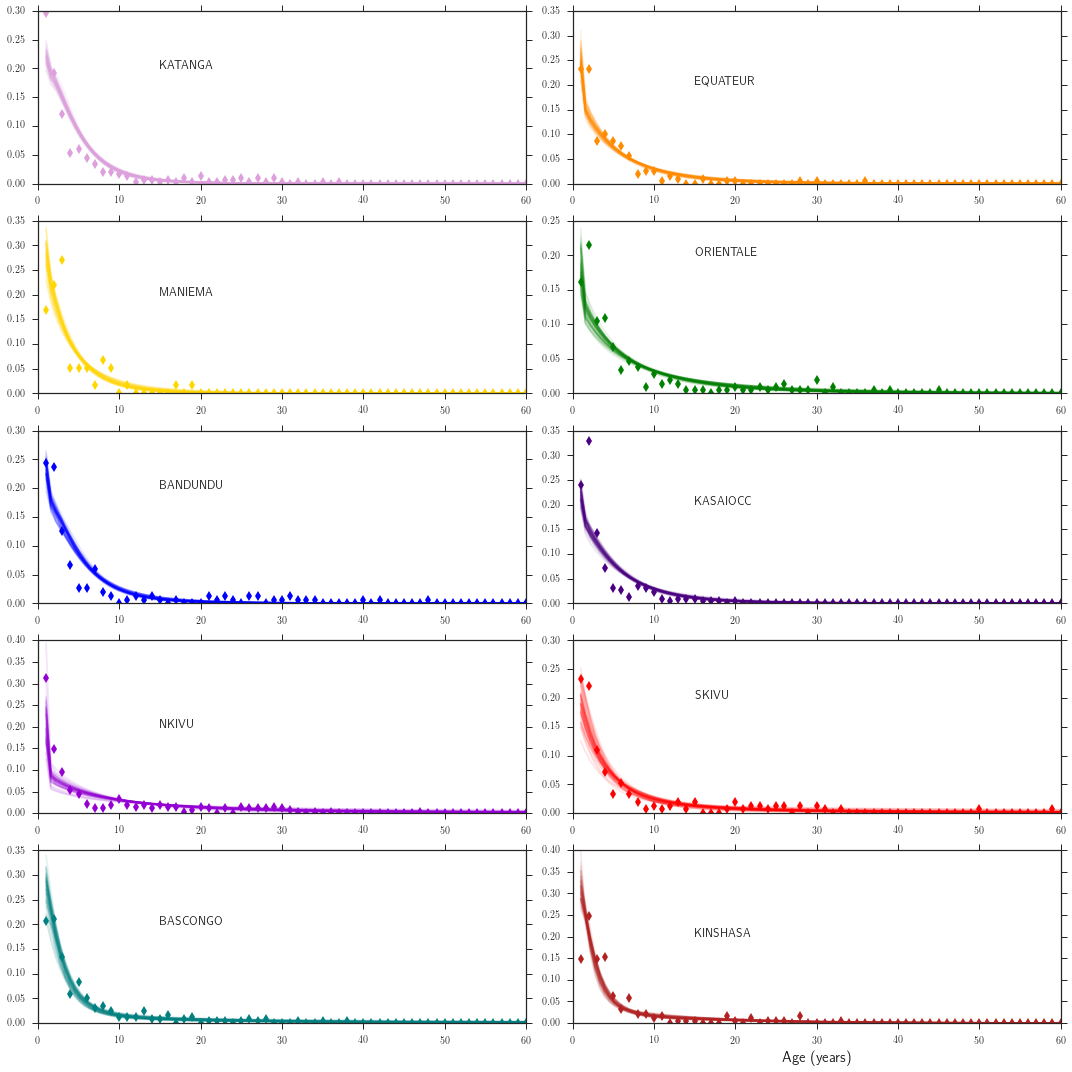

In [12]:
loc_subset = ['KATANGA','EQUATEUR','MANIEMA','ORIENTALE','BANDUNDU','KASAIOCC','NKIVU','SKIVU','BASCONGO','KINSHASA']
colors = ['plum','darkorange','gold','green','blue','indigo','darkviolet','red','teal','firebrick','grey']
#loc_subset = ['BASCONGO','KINSHASA']
#colors = ['teal','firebrick'] #use grey for KASAIOCC
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axis = axes.flatten()
j = 0
for prov in loc_subset:

    cases = cases_pandas.loc[:,prov]
    co = cases.values
    cobs = np.copy(co)  
    total_cases = np.sum(cobs)
    
    samples = []
    c = colors[j]
    ax = axis[j]
    j += 1
    i = 0
    for line in open('chains/DRCLab/sero/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    nspace = 100
    x = np.linspace(1,60.,nspace)
    
    vacc = np.zeros(nspace)
    sero = np.zeros(nspace)
    case = np.zeros(nspace)

    l = len(samples[:,0])
    nplot = 50

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]

       
        m = 0
        for i in x:
            a = float(i)
            case[m] = (1.-np.exp(-(fh*fa/fb*(a*12./fb))**(fa-1.)*np.exp(-(a*12./fb)**fa)))\
            *(np.exp(-ve*vh*(1.-np.exp(-(a*12./vb)**va))-fh*(1.-np.exp(-(a*12./fb)**fa))))
            m += 1
        ax.plot(x,case/(sum(case)*(x[1]-x[0])),alpha=0.1,color=c)
    ax.plot(xplot,cobs.astype(float)/total_cases,color=c,linestyle='none',marker='d')
        #ax1.plot(x/12.,case,alpha=0.1,color=c)
    ax.annotate(prov,(15,0.2),fontsize=12)
    

#ax0.set_ylabel('Force of Infection',fontsize=15)
#ax1.set_ylabel('Vaccination Hazard',fontsize=15)
#ax0.legend(fontsize=15,frameon=True)
#ax1.set_xlim(0,5)
plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()
plt.savefig('CaseFits.png')
#plt.savefig('DRC_foivachaz_noSKivu.pdf')

In [27]:
#Here is the final location and color list:
locs = ['BANDUNDU', 'EQUATEUR', 'KASAIOCC', 'KATANGA', 'KINSHASA', 'NKIVU', 'ORIENTALE', 'SKIVU', 'BASCONGO',\
        'KASAIOR', 'MANIEMA']
colors = ['darkorange','gold','green','blue','indigo','darkviolet','red','teal','grey','plum','firebrick']

BANDUNDU 1989
EQUATEUR 1989
KASAIOCC 989
KATANGA 1989
KINSHASA 1399
NKIVU 1989
ORIENTALE 989
SKIVU 1989
BASCONGO 1490
KASAIOR 1490
MANIEMA 2190


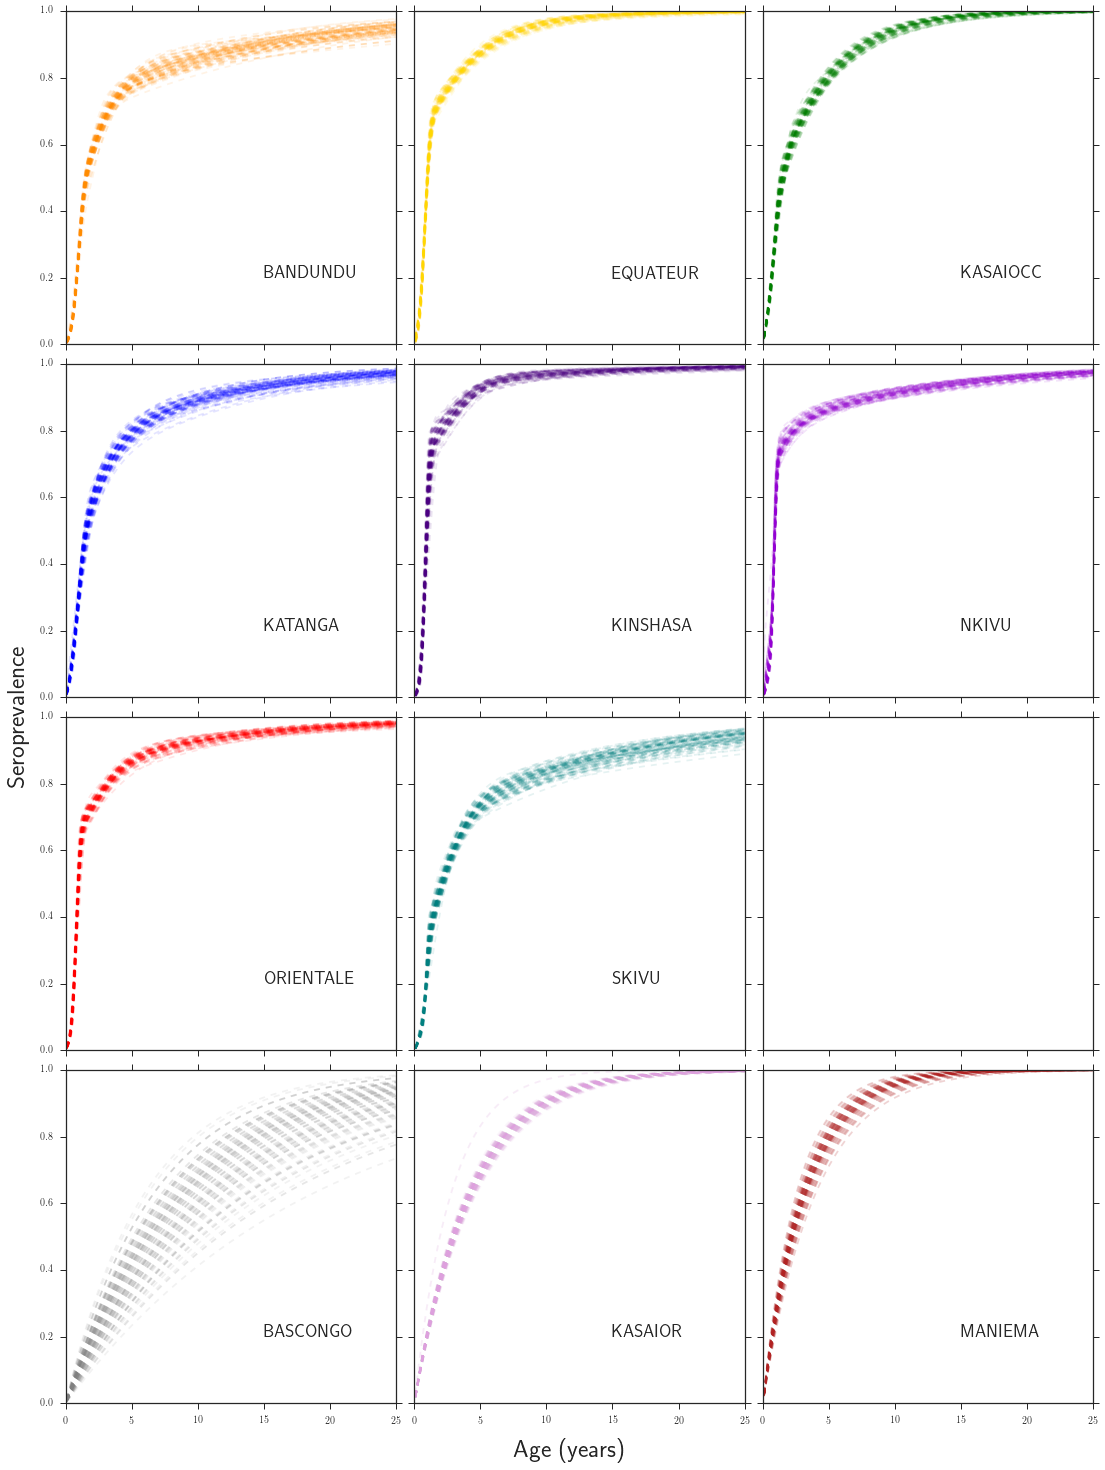

In [163]:
#First, the seroprevalence for each.:
burnin = 500
vobs_pandas = pd.read_csv('../Data/Xvax.csv')
vtrials_pandas = pd.read_csv('../Data/Nvax.csv')
sobs_pandas = pd.read_csv('../Data/YseroNew.csv')
strials_pandas = pd.read_csv('../Data/NseroNew.csv')
cases_pandas = pd.read_csv('../Data/reported_cases_lab.csv')
xplot = np.linspace(1,25,25)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,20),sharex=True,sharey=True)
axis = axes.flatten()

nspace = 1000
x = np.linspace(1,25*12,nspace)

j = 0
for prov in locs:
    #Read in the actual data
    vobs = vobs_pandas.loc[:,prov]
    vtrial = vtrials_pandas.loc[:,prov]
    sobs = sobs_pandas.loc[:,prov]
    strial = strials_pandas.loc[:,prov]
    cases = cases_pandas.loc[:,prov]
    vo = vobs.values
    vt = vtrial.values
    so = sobs.values
    st = strial.values
    co = cases.values
    
    vobs = np.copy(vo)
    vtry = np.copy(vt)
    sobs = np.copy(so)
    stry = np.copy(st)
    cobs = np.copy(co)  
    vtry = np.array(vtry)   
    

    #Get the samples for this province
    samples = []
    if j>8:
        c = colors[j-1]
    else:
        c = colors[j]
    if j==8:
        j+= 1
    ax = axis[j]
    j += 1
    i = 0
    for line in open('chains/BFtest/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    if j>8:
        samples = []
        for line in open('chains/BFtest/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                samples.append(sample)
            i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    print prov, len(samples)
    
    sero = np.zeros(nspace)
    case = np.zeros(nspace)

    l = len(samples[:,0])
    nplot = 100

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]
        con = samples[index,7]
        alph = samples[index,8]
        if j>8:
            alph = 0.
             
        m = 0
        for i in x:
            a = float(i)
            sero[m] = 1. - np.exp(-vh*ve*(1. - np.exp(-(a/vb)**va)) - (alph)*fh*(1. - np.exp(-(a/fb)**fa))-con*a)
            if j>8:
                sero[m] = 1. - np.exp(-con*a)
            m += 1
        ax.plot(x/12.,sero,alpha=0.1,color=c,linestyle='dashed')
    #ax.plot(xplot/12.,sobs[0:25].astype(float)/stry[0:25].astype(float),color=c,marker='*',linestyle='none')
    ax.annotate(prov,(15,0.2),fontsize=18)

#ax0.set_ylabel('Force of Infection',fontsize=15)
#ax1.set_ylabel('Vaccination Hazard',fontsize=15)
#ax0.legend(fontsize=15,frameon=True)
#ax1.set_xlim(0,5)
fig.text(-0.01, 0.5, 'Seroprevalence', ha='center', va='center', rotation='vertical',fontsize=25)
fig.text(0.5, -0.01, 'Age (years)', ha='center', va='center', rotation='horizontal',fontsize=25)
#plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()

In [58]:
#Mapping
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

(26,
 5,
 [12.205664554000066, -13.455999261999978, 0.0, 0.0],
 [31.277300041000046, 5.386098154000024, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x12b7a3790>)

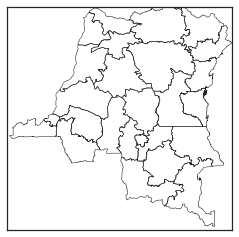

In [110]:
m = Basemap(resolution='i', # c, l, i, h, f or None (crude, low, intermediate, high)
            projection='merc', #mercator
            lat_0=54.5, lon_0=-4.36, #Coordinates of lower-left and upper-right. 
            urcrnrlon=31.33, urcrnrlat= 5.27, llcrnrlon=12.0, llcrnrlat=-13.75);
m.readshapefile('/Users/laurasampson/Work/shapefiles/DRC/GISunit/dps','areas') #DRC

In [114]:
df_poly= pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'provname': [area['name'] for area in m.areas_info]
    })
df_poly['provname'] = map(lambda x: x.upper(), df_poly['provname'])
df_poly['provname'] = df_poly['provname'].map(lambda x: x.replace('-',''))
df_poly['provname'] = df_poly['provname'].map(lambda x: x.replace(' ',''))

In [115]:
print df_poly.provname.unique()

['KINSHASA' 'KONGOCENTRAL' 'MAINDOMBE' 'KWILU' 'KWANGO' 'EQUATEUR'
 'SUDUBANGI' 'NORDUBANGI' 'MONGALA' 'TSHUAPA' 'TSHOPO' 'BASUELE' 'HAUTUELE'
 'ITURI' 'NORDKIVU' 'SUDKIVU' 'MANIEMA' 'LUALABA' 'HAUTLOMAMI' 'TANGANYKA'
 'HAUTKATANGA' 'KASAIORIENTAL' 'SANKURU' 'LOMAMI' 'KASAICENTRAL' 'KASAI']


In [138]:
#Need to add the old province name for each of the new provinces
provtoprov = pd.read_csv('/Users/laurasampson/Work/shapefiles/DRC/GISunit/map_province_names.csv')
name = []
for pfrom in df_poly['provname']:
    pto = provtoprov.loc[provtoprov['from']==pfrom,'to'].iloc[0]
    name.append(pto)


In [147]:
df_poly= pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'provname': [area['name'] for area in m.areas_info],
        'name': [area for area in name]
    })
df_poly['provname'] = map(lambda x: x.upper(), df_poly['provname'])
df_poly['provname'] = df_poly['provname'].map(lambda x: x.replace('-',''))
df_poly['provname'] = df_poly['provname'].map(lambda x: x.replace(' ',''))
df_poly['name'] = df_poly['name'].map(lambda x: x.replace('SUDKIVU','SKIVU'))
df_poly['name'] = df_poly['name'].map(lambda x: x.replace('NORDKIVU','NKIVU'))
df_poly['name'] = df_poly['name'].map(lambda x: x.replace('KASAIORIENTAL','KASAIOR'))
df_poly['name'] = df_poly['name'].map(lambda x: x.replace('KASAIOCCIDENTAL','KASAIOCC'))

In [155]:
clist = []
#Now you need to match this to the color
for n in df_poly.name:
    j = locs.index(n)
    clist.append(colors[j])

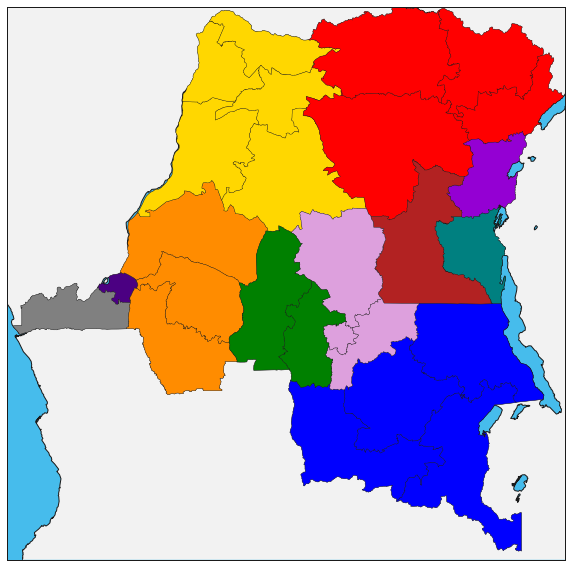

In [156]:

fig, ax = plt.subplots(figsize=(10,20));
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('/Users/laurasampson/Work/shapefiles/DRC/GISunit/dps','areas') #DRC
pc = PatchCollection(df_poly.shapes, zorder=2)
pc.set_facecolor(clist)
ax.add_collection(pc)

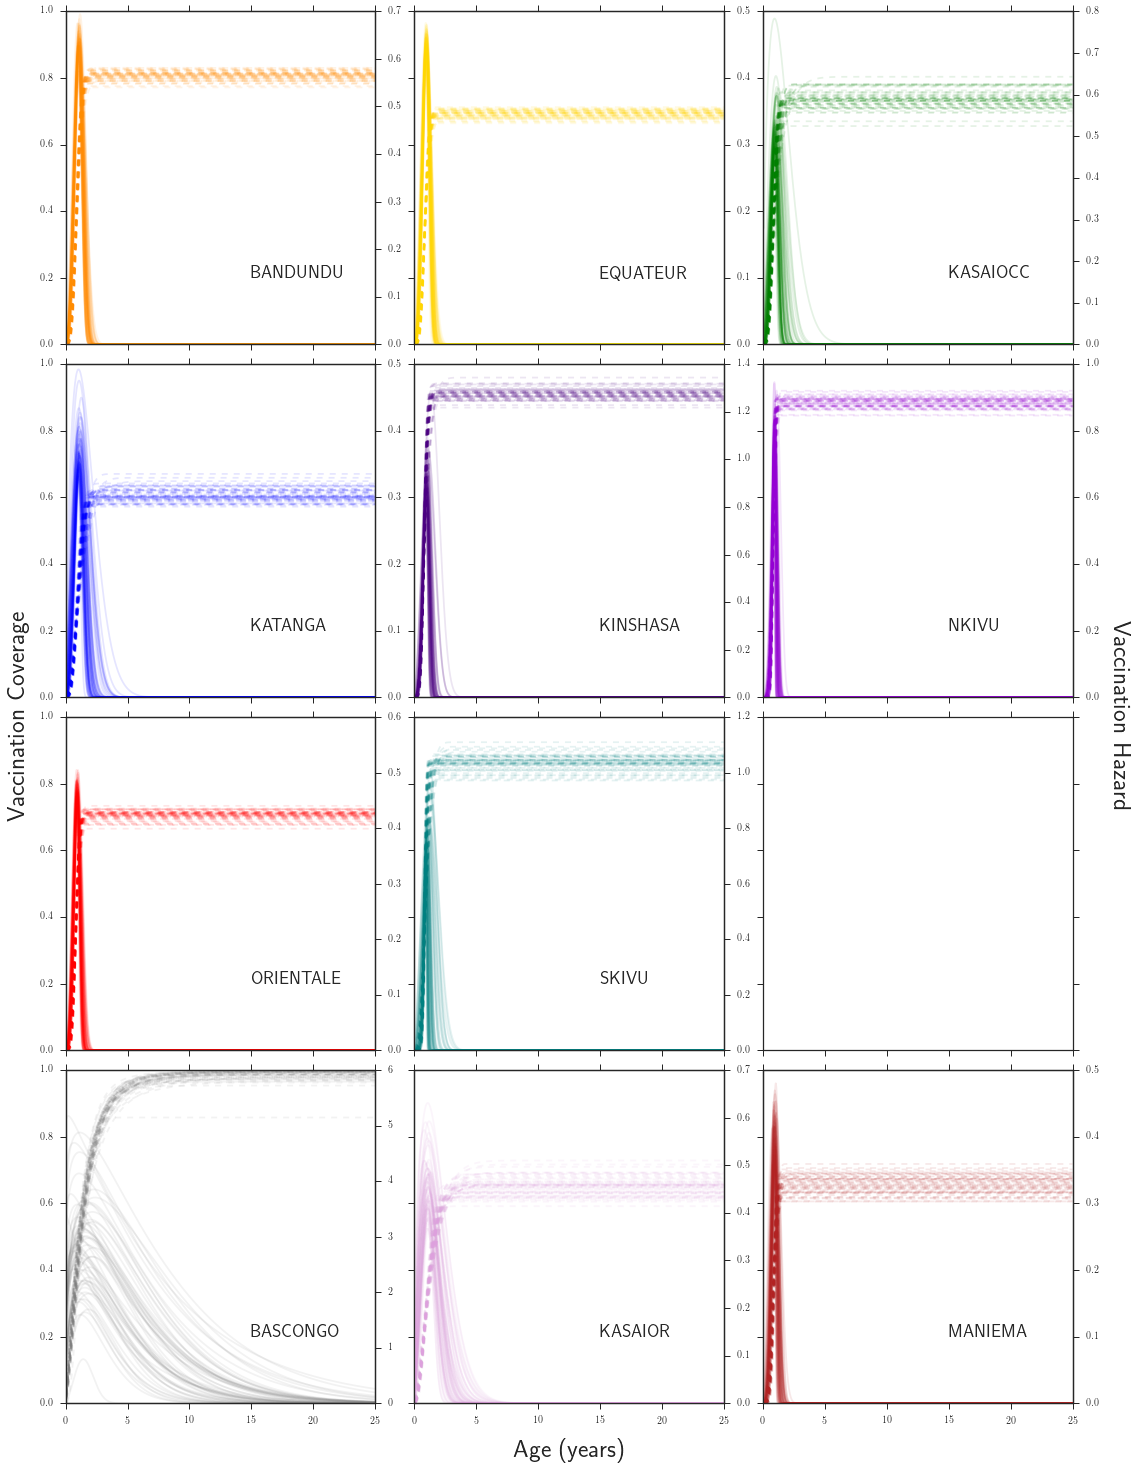

In [196]:
#Vaccination levels plus vaccination hazard
burnin = 500
vobs_pandas = pd.read_csv('../Data/Xvax.csv')
vtrials_pandas = pd.read_csv('../Data/Nvax.csv')
sobs_pandas = pd.read_csv('../Data/YseroNew.csv')
strials_pandas = pd.read_csv('../Data/NseroNew.csv')
cases_pandas = pd.read_csv('../Data/reported_cases_lab.csv')
xplot = np.linspace(1,25,25)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,20),sharex=True,sharey=True)
axis = axes.flatten()

nspace = 1000
x = np.linspace(1,25*12,nspace)

j = 0
for prov in locs:
    #Read in the actual data
    vobs = vobs_pandas.loc[:,prov]
    vtrial = vtrials_pandas.loc[:,prov]
    sobs = sobs_pandas.loc[:,prov]
    strial = strials_pandas.loc[:,prov]
    cases = cases_pandas.loc[:,prov]
    vo = vobs.values
    vt = vtrial.values
    so = sobs.values
    st = strial.values
    co = cases.values
    
    vobs = np.copy(vo)
    vtry = np.copy(vt)
    sobs = np.copy(so)
    stry = np.copy(st)
    cobs = np.copy(co)  
    vtry = np.array(vtry)   
    

    #Get the samples for this province
    samples = []
    if j>8:
        c = colors[j-1]
    else:
        c = colors[j]
    if j==8:
        j+= 1
    ax = axis[j]
    ax2 = ax.twinx()
    j += 1
    i = 0
    for line in open('chains/BFtest/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    if j>8:
        samples = []
        for line in open('chains/BFtest/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                samples.append(sample)
            i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    #print prov, len(samples)
    
    vacc = np.zeros(nspace)
    vhaz = np.zeros(nspace)

    l = len(samples[:,0])
    nplot = 60

    for k in range(nplot):
        index = np.random.randint(l)

        va = samples[index,0] 
        vb = samples[index,1] 
        vh = samples[index,2]  
        fa = samples[index,3] 
        fb = samples[index,4] 
        fh = samples[index,5] 
        ve = samples[index,6]
        con = samples[index,7]
        alph = samples[index,8]
        if j>8:
            alph = 0.
             
        m = 0
        for i in x:
            a = float(i)
            vhaz[m] = vh*(a/vb)**(va-1.)*np.exp(-(a/vb)**(va))
            vacc[m] = 1. - np.exp(-vh*(1. - np.exp(-(a/vb)**va)))
            m += 1
        ax.plot(x/12.,vacc,alpha=0.1,color=c,linestyle='dashed')
        ax2.plot(x/12.,vhaz,alpha=0.1,color=c)
        #ax2.set_yticks([],[])
    #ax.plot(xplot/12.,sobs[0:25].astype(float)/stry[0:25].astype(float),color=c,marker='*',linestyle='none')
    ax.annotate(prov,(15,0.2),fontsize=18)
    ax.set_ybound(0.,1.)

#ax0.set_ylabel('Force of Infection',fontsize=15)
#ax1.set_ylabel('Vaccination Hazard',fontsize=15)
#ax0.legend(fontsize=15,frameon=True)
#ax1.set_xlim(0,5)
fig.text(-0.01, 0.5, 'Vaccination Coverage', ha='center', va='center', rotation='vertical',fontsize=25)
fig.text(1.01, 0.5, 'Vaccination Hazard', ha='center', va='center', rotation=270,fontsize=25)
fig.text(0.5, -0.01, 'Age (years)', ha='center', va='center',fontsize=25)
#plt.xlabel('Age (years)',fontsize=15)
fig.tight_layout()

In [158]:
#Force of infection

darkorange BANDUNDU
gold EQUATEUR
green KASAIOCC
blue KATANGA
indigo KINSHASA
darkviolet NKIVU
red ORIENTALE
teal SKIVU
grey BASCONGO
plum KASAIOR
firebrick MANIEMA


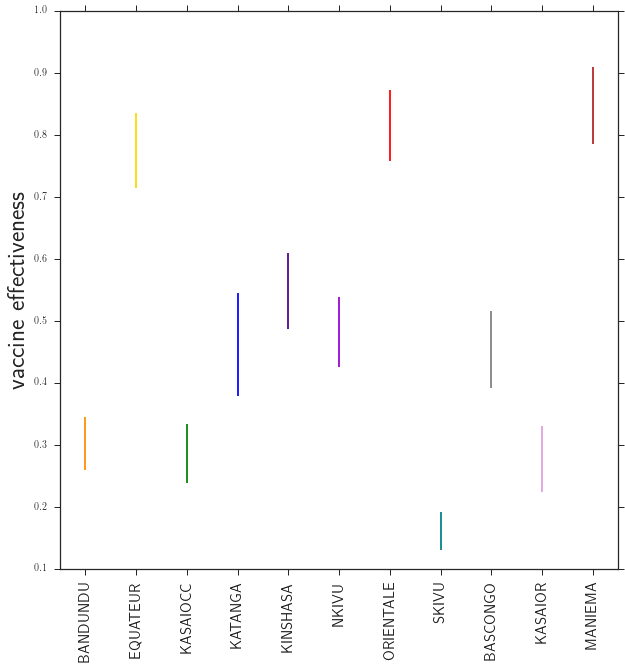

In [189]:
#Vaccine effectiveness
#Vaccination levels plus vaccination hazard
burnin = 500
vobs_pandas = pd.read_csv('../Data/Xvax.csv')
vtrials_pandas = pd.read_csv('../Data/Nvax.csv')
sobs_pandas = pd.read_csv('../Data/YseroNew.csv')
strials_pandas = pd.read_csv('../Data/NseroNew.csv')
cases_pandas = pd.read_csv('../Data/reported_cases_lab.csv')
xplot = np.linspace(1,25,25)

nspace = 1000
x = np.linspace(1,25*12,nspace)
plt.figure(figsize=(10,10))
j = 0
for prov in locs:
    
    #Get the samples for this province
    samples = []
    if j>8:
        c = colors[j-1]
    else:
        c = colors[j]
    if j==8:
        j+= 1
    j += 1
    i = 0
    for line in open('chains/BFtest/'+prov+'/chain_1.txt','r'):
        sample = line.split()
        if i> burnin:
            samples.append(sample)
        i += 1
    if j>8:
        samples = []
        for line in open('chains/BFtest/c_only/'+prov+'/chain_1.txt','r'):
            sample = line.split()
            if i> burnin:
                samples.append(sample)
            i += 1
    samples = np.array(samples)
    samples = samples.astype(float)
    
    l = len(samples[:,0])
    nplot = 100
    
    if j<9:
        r = j
    else:
        r = j-1
    
    vemean = np.mean(samples[:,6])
    vesig = np.sqrt(np.var(samples[:,6]))
    print c, prov
    plt.errorbar(r,vemean,xerr=None,yerr=vesig,color=c)

    #ax.plot(xplot/12.,sobs[0:25].astype(float)/stry[0:25].astype(float),color=c,marker='*',linestyle='none')
    
plt.xticks(np.linspace(1,11,11),locs,rotation='vertical',fontsize=15)
plt.xlim(0.5,11.5)
plt.ylabel('vaccine effectiveness',fontsize=25)

fig.tight_layout()